Imported Data for Vivenda from Drive

In [0]:
#=======INPUT: LOCATION LAT/LONG=======#
Location = (-22.8148,-43.2473)  

#=======INPUT: PATH TO DATAFRAME FILE=======#
pandas_file = '/gdrive/Shared drives/INF560/Code/Data Files/Dataframes/data10-Vivenda.csv'

#=======OUTPUT FILE PATH=======#
output_file = '/gdrive/Shared drives/INF560/Code/Code Files/pickles/loc10model.pkl'

import pandas as pd
df=pd.read_excel(pandas_file)

In [0]:
df.head(5)

,Unnamed: 0,0,1,2,3
0,0,2.7,Level 3,dc:bf:e9:44:a8:ee,2019-12-04 23:02:04.243 UTC
1,1,2.7,Level 3,04:d6:aa:6a:15:a5,2019-12-05 22:11:05.947 UTC
2,2,2.7,Level 3,c0:25:e9:7f:32:c2,2019-12-10 00:54:20.278 UTC
3,3,2.7,Level 3,da:3c:e6:93:50:f9,2019-12-10 18:31:40.405 UTC
4,4,2.7,Level 3,4c:66:41:2a:f2:01,2019-12-15 01:11:06.454 UTC


In [0]:
df = df.drop('Unnamed: 0', 1)

In [0]:
df

,0,1,2,3
0,2.7,Level 3,dc:bf:e9:44:a8:ee,2019-12-04 23:02:04.243 UTC
1,2.7,Level 3,04:d6:aa:6a:15:a5,2019-12-05 22:11:05.947 UTC
2,2.7,Level 3,c0:25:e9:7f:32:c2,2019-12-10 00:54:20.278 UTC
3,2.7,Level 3,da:3c:e6:93:50:f9,2019-12-10 18:31:40.405 UTC
4,2.7,Level 3,4c:66:41:2a:f2:01,2019-12-15 01:11:06.454 UTC
...,...,...,...,...
231959,2.7,Level 3,38:80:df:82:7b:8e,2019-12-21 00:05:27.611 UTC
231960,2.7,Level 3,10:98:c3:0e:cd:ba,2019-12-06 04:52:35.136 UTC
231961,2.7,Level 3,fa:df:f6:f7:51:06,2019-12-16 14:43:33.033 UTC
231962,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-28 10:20:08.588 UTC


In [0]:
df.columns = ['Ratings', 'level','MAC-ID','Timestamp']

In [0]:
df

,Ratings,level,MAC-ID,Timestamp
0,2.7,Level 3,dc:bf:e9:44:a8:ee,2019-12-04 23:02:04.243 UTC
1,2.7,Level 3,04:d6:aa:6a:15:a5,2019-12-05 22:11:05.947 UTC
2,2.7,Level 3,c0:25:e9:7f:32:c2,2019-12-10 00:54:20.278 UTC
3,2.7,Level 3,da:3c:e6:93:50:f9,2019-12-10 18:31:40.405 UTC
4,2.7,Level 3,4c:66:41:2a:f2:01,2019-12-15 01:11:06.454 UTC
...,...,...,...,...
231959,2.7,Level 3,38:80:df:82:7b:8e,2019-12-21 00:05:27.611 UTC
231960,2.7,Level 3,10:98:c3:0e:cd:ba,2019-12-06 04:52:35.136 UTC
231961,2.7,Level 3,fa:df:f6:f7:51:06,2019-12-16 14:43:33.033 UTC
231962,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-28 10:20:08.588 UTC


Formatted the Timestamps into dateTime types from string 

In [0]:
df['Timestamp'] = df['Timestamp'].str.replace(r'UTC', '')

In [0]:
df.head(5)

,Ratings,level,MAC-ID,Timestamp
0,2.7,Level 3,dc:bf:e9:44:a8:ee,2019-12-04 23:02:04.243
1,2.7,Level 3,04:d6:aa:6a:15:a5,2019-12-05 22:11:05.947
2,2.7,Level 3,c0:25:e9:7f:32:c2,2019-12-10 00:54:20.278
3,2.7,Level 3,da:3c:e6:93:50:f9,2019-12-10 18:31:40.405
4,2.7,Level 3,4c:66:41:2a:f2:01,2019-12-15 01:11:06.454


In [0]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [0]:
df1=df

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp
0,2.7,Level 3,dc:bf:e9:44:a8:ee,2019-12-04 23:02:04.243
1,2.7,Level 3,04:d6:aa:6a:15:a5,2019-12-05 22:11:05.947
2,2.7,Level 3,c0:25:e9:7f:32:c2,2019-12-10 00:54:20.278
3,2.7,Level 3,da:3c:e6:93:50:f9,2019-12-10 18:31:40.405
4,2.7,Level 3,4c:66:41:2a:f2:01,2019-12-15 01:11:06.454


Grouped the data by the MAC ID and sorted by Timestamp . This was done to extract consecutive wait times between 2 timestamps which is indicative of the time duration for which a user has been around this location .

In [0]:
df1=df1.sort_values('Timestamp', ascending=True)

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp
224011,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:00:24.288
134847,2.7,Level 3,8c:45:00:2a:9f:37,2019-12-01 00:00:51.158
187636,2.7,Level 3,0c:cb:85:b3:7b:b2,2019-12-01 00:00:55.507
100106,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:01:24.298
219061,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-01 00:01:39.525


Computed the wait-time in seconds 

In [0]:
df1['Wait-Time']=df1['Timestamp'].diff().astype('timedelta64[s]')

In [0]:
df1['Wait-Time'].fillna((df1['Wait-Time'].mean()), inplace=True)

In [0]:
df1.head(50)

,Ratings,level,MAC-ID,Timestamp,Wait-Time
224011,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:00:24.288,10.75772
134847,2.7,Level 3,8c:45:00:2a:9f:37,2019-12-01 00:00:51.158,26.00000
187636,2.7,Level 3,0c:cb:85:b3:7b:b2,2019-12-01 00:00:55.507,4.00000
100106,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:01:24.298,28.00000
219061,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-01 00:01:39.525,15.00000
217685,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-01 00:01:39.526,0.00000
98596,2.7,Level 3,8c:45:00:2a:9f:37,2019-12-01 00:01:41.160,1.00000
41510,2.7,Level 3,0c:cb:85:b3:7b:b2,2019-12-01 00:01:46.426,5.00000
185959,2.7,Level 3,e8:36:17:0f:b0:73,2019-12-01 00:02:30.245,43.00000
89131,2.7,Level 3,8c:45:00:2a:9f:37,2019-12-01 00:02:31.187,0.00000


Extracted the location of various gates by the flights that depart from them in terminal two ( Google Maps & Aeroporto de galeo website data ) and computed the GeoPy distance between the current outlet and the Gates .

In [0]:
Gate_Delta = (-22.8151,-43.2457)

In [0]:
Gate_United= (-22.8151,-43.2455)

In [0]:
Gate_AA= (-22.8148,-43.2449)

In [0]:
Gate_Emirates= (-22.8141,-43.2453)

In [0]:
Gate_Lufthansa= (-22.8142,-43.2457)

In [0]:
Gate_Copa = (-22.8140,-43.2455)

In [0]:
Gate_AirFrance = (-22.8141,-43.2460)

In [0]:
Gate_AirArg = (-22.8142,-43.2454)

In [0]:
Gate_Airitalia = (-22.8142,-43.2460)

In [0]:
from geopy.distance import vincenty

In [0]:
df1['dist_DA'] = vincenty(Location,Gate_Delta).meters

In [0]:
df1['dist_UA'] =vincenty(Location,Gate_United).meters

In [0]:
df1['dist_AA'] =vincenty(Location,Gate_AA).meters

In [0]:
df1['dist_EM']= vincenty(Location,Gate_Emirates).meters

In [0]:
df1['dist_LF']= vincenty(Location,Gate_Lufthansa).meters

In [0]:
df1['dist_Copa'] = vincenty(Location,Gate_Copa).meters

In [0]:
df1['dist_AF']  = vincenty(Location,Gate_AirFrance).meters

In [0]:
df1['dist_AG'] = vincenty(Location,Gate_AirArg).meters

In [0]:
df1['dist_AI'] = vincenty(Location,Gate_Airitalia).meters

Appended the geodistances in meters as additional columns in the dataframe

In [0]:
df1.head(5)

,Ratings,level,MAC-ID,Timestamp,Wait-Time,dist_DA,dist_UA,dist_AA,dist_EM,dist_LF,dist_Copa,dist_AF,dist_AG,dist_AI
224011,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:00:24.288,10.75772,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
134847,2.7,Level 3,8c:45:00:2a:9f:37,2019-12-01 00:00:51.158,26.00000,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
187636,2.7,Level 3,0c:cb:85:b3:7b:b2,2019-12-01 00:00:55.507,4.00000,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
100106,2.7,Level 3,da:81:68:76:40:24,2019-12-01 00:01:24.298,28.00000,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
219061,2.7,Level 3,50:3e:aa:33:18:c3,2019-12-01 00:01:39.525,15.00000,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157


Performed Binning of the data into target risk levels based on stats from the following link:

[AirlineFlightDelays Stats : A Survey](https://stat-or.unc.edu/files/2018/09/Paper3_MSOM_2012_AirlineFlightDelays.pdf)


Target Variable recommended risk levels -
**Encoding Scheme :**

*   Low Risk - 0
*   Medium Risk - 1


*   High Risk -2





In [0]:
median=df1['Wait-Time'].median()

In [0]:
median

4.0

In [0]:
percentile_75 = df1['Wait-Time'].quantile(q=0.75)

In [0]:
percentile_75

11.0

In [0]:
percentile_25 = df1['Wait-Time'].quantile(q=0.25)

In [0]:
percentile_25

0.0

In [0]:
df1.shape

(231964, 14)

In [0]:
df1['Risk-level'] = 0

In [0]:
df1.loc[ (df1['Wait-Time'] > percentile_75) & (df1.Ratings <= 3.0 ),'Risk-level'] = 2

In [0]:
df1.loc[ (df1['Wait-Time'] > median) & (df1['Wait-Time'] <= percentile_75)  & (df1.Ratings <= 3.0 ),'Risk-level'] = 1

In [0]:
df1.loc[(df1['Wait-Time'] <= median) & (df1.Ratings <= 3.0 ),'Risk-level'] = 0

In [0]:
len(df1[df1['Risk-level']==2])

57562

In [0]:
df1.shape

(231964, 12)

In [0]:
df1= df1.drop('Timestamp', 1)


KeyError: ignored

In [0]:
df1= df1.drop('MAC-ID', 1)
df1= df1.drop('level',1)

In [0]:
df1.shape

(231964, 12)

(0.0, 100.0)

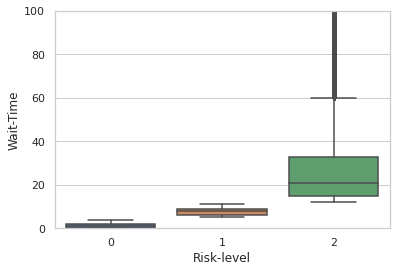

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = df1
ax = sns.boxplot(x=df1['Risk-level'],y=df1['Wait-Time'])
ax.set_ylim([0, 100])

Data has now been completely preprocessed and ready for analysis 

Train-test Split Performed : ( 80:20 split taken . 80% for training the model and 20% for testing the model ) . Will use the training set itself to perform 10 fold cross validation for model selection

In [0]:
data_x= df1.iloc[:,0:11]
data_y =df1.iloc[:,11:12]

In [0]:
import math
trainVal = math.trunc(df1.shape[0]*.8)
numRows = df1.shape[0]

In [0]:
train_x = data_x.iloc[0:trainVal,:]
train_y = data_y.iloc[0:trainVal,:]
test_x = data_x.iloc[trainVal:numRows,:]
test_y = data_y.iloc[trainVal:numRows,:]

In [0]:
from sklearn.utils import shuffle
train_x,train_y = shuffle(train_x,train_y)

In [0]:
test_x,test_y = shuffle(test_x,test_y)

In [0]:
test_x.shape

(46393, 11)

# Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [0]:
mdl = LogisticRegressionCV(cv=10)

In [0]:
mdl.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
preds_y=mdl.predict(test_x)

In [0]:
training_acc = mdl.score(train_x,train_y)
test_acc = mdl.score(test_x,test_y)

Evaluation Metrics : Accuracy , Precision , Recall , F-1 score and Area under the curve - Reason for selection of these metrics ( Classification problem statement )

In [0]:
test_acc 

1.0

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat = metrics.confusion_matrix(test_y,preds_y)
report_Logistic=classification_report(test_y,preds_y)

In [0]:
print(confusion_mat)

[[20227     0     0]
 [    0 12313     0]
 [    0     0 13853]]


In [0]:
print(report_Logistic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20227
           1       1.00      1.00      1.00     12313
           2       1.00      1.00      1.00     13853

    accuracy                           1.00     46393
   macro avg       1.00      1.00      1.00     46393
weighted avg       1.00      1.00      1.00     46393



In [0]:
classes = [0,1,2]
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from itertools import cycle
from scipy import interp
from sklearn.preprocessing import label_binarize
def report_multi_class(train_X_norm, train_Y, test_Y, y_predict, y_score):
    lw = 2
    con_matrix = confusion_matrix(test_Y, y_predict)    
    train_Y = label_binarize(train_Y, classes=classes)
    test_Y = label_binarize(test_Y, classes=classes)
    y_predict = label_binarize(y_predict, classes=classes)
    n_classes = train_Y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'pink', 'olive', 
                    'brown', 'wheat'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="upper left")
    plt.show()
    
    print("Confusion Matrix: \n", con_matrix)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


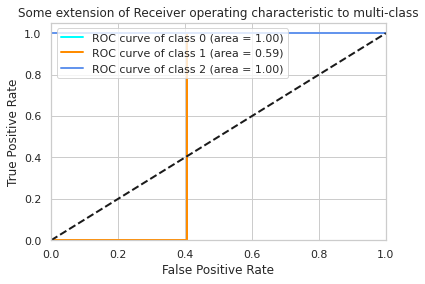

Confusion Matrix: 
 [[20227     0     0]
 [    0 12313     0]
 [    0     0 13853]]


In [0]:
y_score = mdl.decision_function(test_x)
report_multi_class(train_x, train_y, test_y, preds_y, y_score)

# RBF Kernelized Support vector machine 

In [0]:
from sklearn.svm import SVC
from sklearn import svm

mdl_svm=svm.SVC(kernel='rbf')
mdl_svm.fit(train_x,train_y)
preds_svm=mdl_svm.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
test_acc_svm = mdl_svm.score(test_x,test_y)

Evaluation Metrics : Accuracy , precision , recall , F1-score and Area under the curve

In [0]:
test_acc_svm

0.978746793697325

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat_svm = metrics.confusion_matrix(test_y,preds_svm)
report_svm=classification_report(test_y,preds_svm)

In [0]:
print(confusion_mat_svm)
print(report_svm)

[[20227     0     0]
 [    0 12313     0]
 [    0   986 12867]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20227
           1       0.93      1.00      0.96     12313
           2       1.00      0.93      0.96     13853

    accuracy                           0.98     46393
   macro avg       0.98      0.98      0.97     46393
weighted avg       0.98      0.98      0.98     46393



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


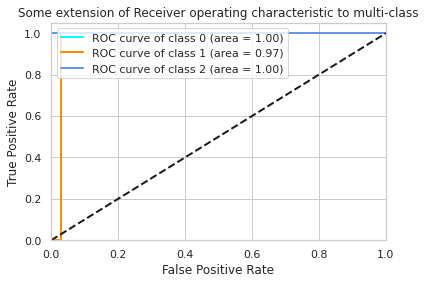

Confusion Matrix: 
 [[20227     0     0]
 [    0 12313     0]
 [    0   986 12867]]


In [0]:
y_score_svm = mdl_svm.decision_function(test_x)
report_multi_class(train_x, train_y, test_y, preds_svm, y_score_svm)

# Multinomial Naive Bayes Classifier reinforced by one vs all classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [0]:
mdl2= OneVsRestClassifier(MultinomialNB())

In [0]:
mdl2.fit(train_x,train_y)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [0]:
pred_y_NB=mdl2.predict(test_x)

In [0]:
training_acc_NB = mdl2.score(train_x,train_y)
test_acc_NB = mdl2.score(test_x,test_y)

Evaluation Metrics : Accuracy , precision , recall , F1-score 

In [0]:
test_acc_NB

0.9128532321686461

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_mat_NB = metrics.confusion_matrix(test_y,pred_y_NB)
report_NB=classification_report(test_y,pred_y_NB)

In [0]:
print(confusion_mat_NB)

[[20227     0     0]
 [ 4043  8270     0]
 [    0     0 13853]]


In [0]:
print(report_NB)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     20227
           1       1.00      0.67      0.80     12313
           2       1.00      1.00      1.00     13853

    accuracy                           0.91     46393
   macro avg       0.94      0.89      0.90     46393
weighted avg       0.93      0.91      0.91     46393



# K Nearest Neighbors Classifier 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
mdl3=KNeighborsClassifier(n_neighbors=5)

In [0]:
mdl3.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
preds_KNN=mdl3.predict(test_x)

In [0]:
training_acc_KNN = mdl3.score(train_x,train_y)
test_acc_KNN = mdl3.score(test_x,test_y)

Evaluation Metrics : Accuracy ,Precision ,recall and F1-score 

In [0]:
test_acc_KNN

1.0

In [0]:
from sklearn import metrics

confusion_mat_KNN = metrics.confusion_matrix(test_y,preds_KNN)
report_KNN=classification_report(test_y,preds_KNN)

In [0]:
print(confusion_mat_KNN)
print(report_KNN)

[[20227     0     0]
 [    0 12313     0]
 [    0     0 13853]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20227
           1       1.00      1.00      1.00     12313
           2       1.00      1.00      1.00     13853

    accuracy                           1.00     46393
   macro avg       1.00      1.00      1.00     46393
weighted avg       1.00      1.00      1.00     46393



# Random forest classifier ( Boosted decision trees )

In [0]:
from sklearn.ensemble import RandomForestClassifier

mdl_RF = RandomForestClassifier(n_estimators=10,oob_score =True,class_weight='balanced',max_depth=20)
mdl_RF.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
preds_RF=mdl_RF.predict(test_x)


Evaluation Metrics : Out of Bag error estimate , Confusion Matrix 

In [0]:
confusion_mat = confusion_matrix(test_y,preds_RF)
report_RF=classification_report(test_y,preds_RF)
oob_score = mdl_RF.oob_score_
oob_error = 1 - oob_score

print("OOB score: ",oob_score)
print("Out of bag error estimate test data: ",oob_error)
print("Confusion Matrix test data:\n",confusion_mat)

OOB score:  0.9951016053154857
Out of bag error estimate test data:  0.004898394684514251
Confusion Matrix test data:
 [[20227     0     0]
 [    0 12313     0]
 [    0     0 13853]]


After comparing the evaluation metrics of the above built classifiers and the efficiency and complexity of the model in runtime considering that we would be compressing the model as a pickle file to deploy it in the back end of a web application , RBF SVM seem ideal for this scenario 

In [0]:
import pickle

In [0]:
pickle.dump(mdl_svm, open(output_file,'wb'))

In [0]:
pickle_loader = pickle.load(open(output_file,'rb'))

In [0]:
preds_production=pickle_loader.predict(test_x)

In [0]:
pickle_loader.score(test_x,test_y)

0.978746793697325

In [0]:
test_x.head()

,Ratings,Wait-Time,dist_DA,dist_UA,dist_AA,dist_EM,dist_LF,dist_Copa,dist_AF,dist_AG,dist_AI
135489,2.7,4.0,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
73866,2.7,26.0,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
71964,2.7,20.0,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
96540,2.7,4.0,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
158311,2.7,9.0,167.58486,187.753833,246.38848,219.470375,177.18931,204.931184,154.34044,206.064387,149.086157
